## Assignment 1: Percptrons (Programming)

- This  assignment relies solely on NumPy for data manipulation and algorithm implementation.You will need to implement more of the fundamental operations themselves, including:

    - Loading and preprocessing the dataset
    - Implementing feature scaling
    - Creating the core perceptron functions (activation, prediction, and training)
    - Evaluating the model's performance
    - Visualizing the results

- You will  a deeper understanding of the underlying mechanics of the perceptron algorithm and data preprocessing steps. It also provides practice in using NumPy for numerical computations and data manipulation.

In [3]:
# In this assignment, you will implement the perceptron learning algorithm
# using only NumPy. You'll work with the Iris dataset, focusing on binary classification.

# First, let's import NumPy and set up our data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

# Question 1: Load and prepare the Iris dataset
# Load the Iris dataset from the provided URL, extract the first two classes,
# and split it into training and testing sets.

import numpy as np
import pandas as pd

def load_iris_data(url):
    # Load the dataset
    data = pd.read_csv(url, header=None)

    # Separate features and labels
    X = data.iloc[:, :-1].values
    y0 = data.iloc[:, -1].values
    classes = np.array(y0)
    unique_classes, labels = np.unique(classes, return_inverse=True)

    # Keep only the first two classes
    X = X[labels < 2]
    y = labels[labels < 2]

    # Shuffle and split the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    split = int(0.8 * X.shape[0])
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
X_train, X_test, y_train, y_test = load_iris_data(url)


In [5]:
# Question 2: Implement feature scaling
# Create a function to perform standardization (mean=0, std=1) on the features

def standardize_features(X_train, X_test):
    # Compute the mean and standard deviation on the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Avoid division by zero by setting standard deviation of 0 to 1
    std = np.where(std == 0, 1, std)

    # Standardize the training data
    X_train_standardized = (X_train - mean) / std

    # Standardize the test data using the same mean and std as the training data
    X_test_standardized = (X_test - mean) / std

    return X_train_standardized, X_test_standardized

In [6]:
X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

In [7]:
# Question 3: Implement the perceptron activation function
def perceptron_activation(x):
    # Apply the step function: if x >= 0, return 1, else return 0
    return np.where(x >= 0, 1, 0)


In [8]:
# Question 4: Implement the perceptron prediction function
def perceptron_predict(x, w):
    # Compute the weighted sum of the inputs and weights
    weighted_sum = np.dot(x, w)

    # Apply the perceptron activation function
    return perceptron_activation(weighted_sum)


In [9]:
# Question 5: Implement the perceptron training function
def train_perceptron(X, y, learning_rate, epochs):
    num_samples, num_features = X.shape
    w = np.zeros(num_features + 1)  # Initialize weights (including bias)

    # Add a bias term to the input features
    X_with_bias = np.hstack([X, np.ones((num_samples, 1))])

    for epoch in range(epochs):
        for i in range(num_samples):
            # Get the input and label for the current sample
            x_i = X_with_bias[i]
            y_i = y[i]

            # Compute the prediction
            prediction = perceptron_predict(x_i, w)

            # Calculate the error
            error = y_i - prediction

            # Update weights: w = w + learning_rate * error * x_i
            w += learning_rate * error * x_i

    return w


In [10]:
# Question 6: Train the perceptron
# Use your implemented functions to train a perceptron on the Iris dataset.
# Use a learning rate of 0.01 and 100 epochs.

# Load and prepare the Iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
X_train, X_test, y_train, y_test = load_iris_data(url)
X_train_standardized, X_test_standardized = standardize_features(X_train, X_test)

# Define the learning rate and number of epochs
learning_rate = 0.01
epochs = 100

# Train the perceptron
weights = train_perceptron(X_train_standardized, y_train, learning_rate, epochs)

print("Trained Weights:", weights)

# Optional: Evaluate the performance on the test data
def evaluate_perceptron(X_test, y_test, weights):
    # Add a bias term to the test data
    X_test_with_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

    # Get predictions
    predictions = perceptron_predict(X_test_with_bias, weights)

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test)

    return accuracy

# Evaluate the perceptron
accuracy = evaluate_perceptron(X_test_standardized, y_test, weights)
print("Test Accuracy:", accuracy)


Trained Weights: [ 0.00986329 -0.01778352  0.01420165  0.01470464  0.        ]
Test Accuracy: 1.0


In [11]:
# Question 7: Evaluate the perceptron
# Implement a function to calculate the accuracy of your trained perceptron on the test set.

def calculate_accuracy(X, y, w):
    # Add a bias term to the test data
    X_with_bias = np.hstack([X, np.ones((X.shape[0], 1))])

    # Get predictions using the perceptron model
    predictions = perceptron_predict(X_with_bias, w)

    # Calculate accuracy
    accuracy = np.mean(predictions == y)

    return accuracy

# Calculate and print the accuracy on the test set
accuracy = calculate_accuracy(X_test_standardized, y_test, weights)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


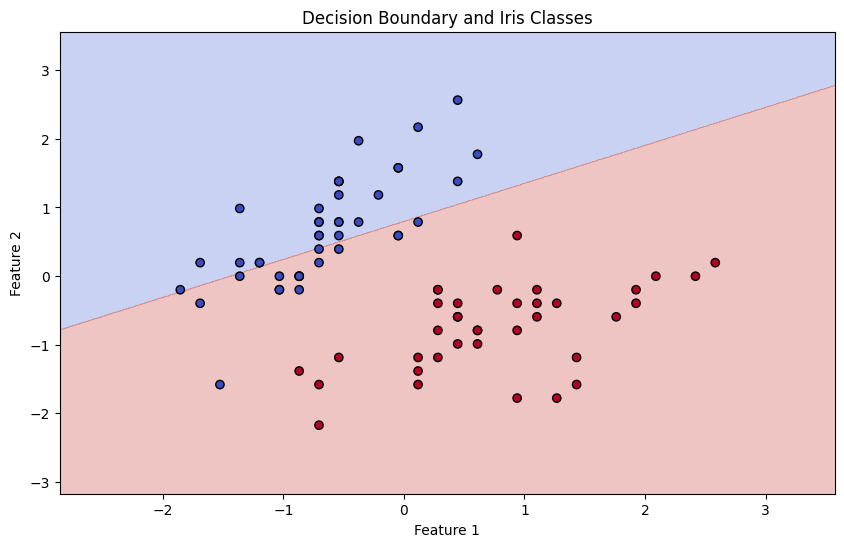

In [12]:

# Question 8: Visualization
# Create a scatter plot of the two Iris classes using the first two features.
# Then, plot the decision boundary of your trained perceptron.

def plot_decision_boundary(X, y, w):
    # Select the first two features and corresponding weights for visualization
    X = X[:, :2]
    w = w[:3]

    # Add a bias term to the input data
    X_with_bias = np.hstack([X, np.ones((X.shape[0], 1))])

    # Define the range for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid to pass it to the perceptron_predict function
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_with_bias = np.hstack([grid, np.ones((grid.shape[0], 1))])

    # Get predictions for the grid
    Z = perceptron_predict(grid_with_bias, w)
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', marker='o')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary and Iris Classes')
    plt.show()

# Plot the decision boundary using the test data and trained weights
plot_decision_boundary(X_train_standardized, y_train, weights)


Evaluating class 0 vs others...


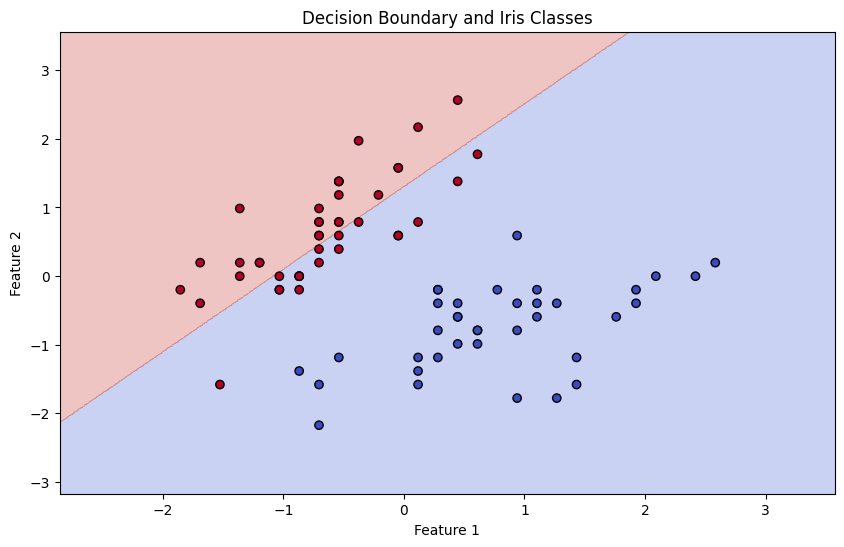

Accuracy for class 0: 1.0
Class 0 can be perfectly separated from the other classes.
Evaluating class 1 vs others...


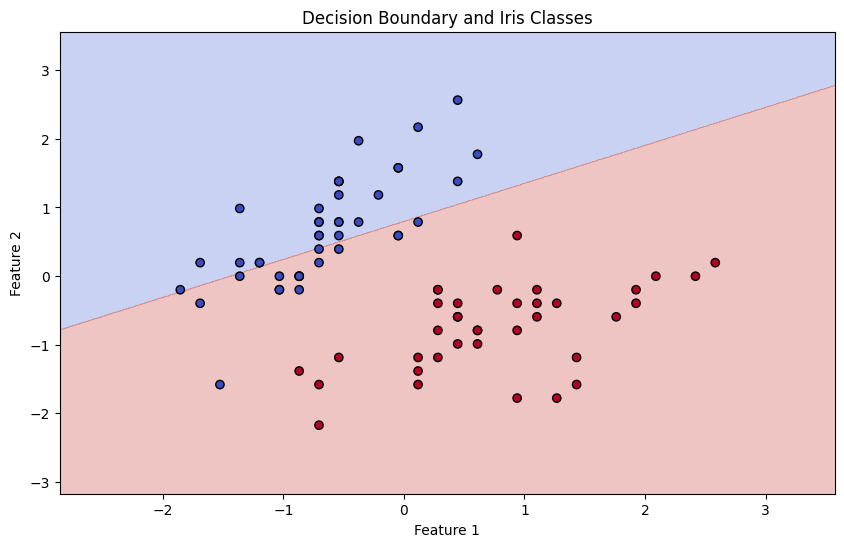

Accuracy for class 1: 1.0
Class 1 can be perfectly separated from the other classes.


In [13]:
# Question 9: Determine which class can be perfectly separated
# In the original dataset, there are three classes. The objective of this question is to find out which class can be perfectly separated from the other two.
# Plot the decision boundary
def train_and_evaluate_per_class(X, y, class_index, learning_rate=0.01, epochs=100):
    # Create binary labels for the current class
    y_binary = np.where(y == class_index, 1, 0)

    # Split data into training and testing
    split = int(0.8 * X.shape[0])
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y_binary[:split], y_binary[split:]

    # Standardize features
    X_train, X_test = standardize_features(X_train, X_test)

    # Train perceptron
    weights = train_perceptron(X_train, y_train, learning_rate, epochs)

    # Evaluate on test set
    accuracy = calculate_accuracy(X_test, y_test, weights)

    # Plot decision boundary
    plot_decision_boundary(X_train, y_train, weights)

    return accuracy, weights

# Check if `y` is defined
if 'y_train' in globals() and 'y_test' in globals():
    # Combine train and test labels for evaluation
    y_combined = np.concatenate([y_train, y_test])
    X_combined = np.concatenate([X_train, X_test])

    # Iterate through each class and evaluate
    for class_index in np.unique(y_combined):
        print(f"Evaluating class {class_index} vs others...")
        accuracy, weights = train_and_evaluate_per_class(X_combined, y_combined, class_index)
        print(f"Accuracy for class {class_index}: {accuracy}")
        if accuracy == 1.0:
            print(f"Class {class_index} can be perfectly separated from the other classes.")
else:
    print("The variable `y_train` or `y_test` is not defined. Make sure to load and prepare the dataset.")